## 生存分析教程


### 安装所需要的库
取消自己没有安装的库的行注释即可 安装

In [ ]:
# % pip install lifelines
# % pip install pandas
# % pip install matplotlib



### 初识lifelines
 我所用的生存分析工具 都是借助lifelines 这个开源Python库 
 lifelines也提供了自己的教程文档 这里给出地址
 https://lifelines.readthedocs.io/en/latest/index.html
![title](img/微信截图_20211220141754.png)

####  导入所需库

In [2]:
from lifelines import WeibullFitter
import pandas as pd
from matplotlib import pyplot as plt


Bad key "text.kerning_factor" on line 4 in
D:\Users\LX\Anaconda3\envs\pytorch\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


#### 简单实例

In [3]:
    df = pd.read_csv(r'a区块生存分析.csv')
    # df = pd.read_csv(r'a区块生存分析.xls') #但此目录下并没有这个Excel文件哈
    df.head()

,0,T,E
0,PL19-3-A01ST1,817,1
1,PL19-3-A01,2240,1
2,PL19-3-A03ST3,2894,1
3,PL19-3-A05ST7,2027,1
4,PL19-3-A08ST4,698,1


这里读取了一个csv格式的表格， csv表格是一个轻量化的表格，比起Excel 读取写入要更快一些，但功能也更简单
读取Excel 的函数在上方的单元格中给出并注释。
上方就是这个表的内容，第一行就是指定表的列名。
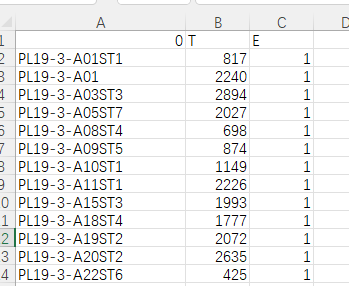

In [4]:
    wbf=WeibullFitter()
    wbf.fit(df['T'],df['E'])  #对应上表的 T（时间） 和 E（事件）  也可以给这两列改名  表格 和这行代码同时改即可

<lifelines.WeibullFitter:"Weibull_estimate", fitted with 25 total observations, 10 right-censored observations>

<lifelines.WeibullFitter:"Weibull_estimate", fitted with 25 total observations, 10 right-censored observations>
   number of observations = 25
number of events observed = 15
           log-likelihood = -126.70
               hypothesis = lambda_ != 1, rho_ != 1

---
           coef   se(coef)   coef lower 95%   coef upper 95%    z      p   -log2(p)
lambda_ 2074.18     247.47          1589.15          2559.20 8.38 <0.005      54.04
rho_       2.17       0.45             1.28             3.05 2.59   0.01       6.70
---
AIC = 257.39

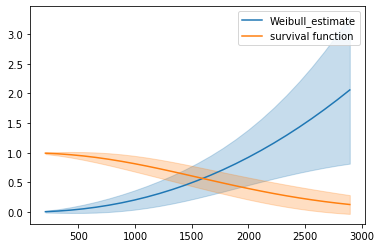

In [5]:
    wbf.print_summary() # 给出拟合后的统计学信息
    wbf.plot()# 画出的是累计风险 蓝线
    wbf.plot_survival_function(label="survival function") #这个是我们常用的生存函数  黄线

可以看到给出summary给出的两行参数  lambda 和rho 分别对应生存函数公式
$$
S(t)=\exp \left(-\left(\frac{t}{\lambda}\right)^{\rho}\right), \lambda>0, \rho>0
$$
第一列就是对应置信区间最中间的参数  其他的参数具体意义大家可以自行搜索
	
    
     在已运行t2天的情况下生存概率为百分之五十的天数为t1

$$
			t_{1}=\lambda \cdot\left(\left(\left(\frac{t_{2}}{\lambda}\right)^{\rho}-\ln \frac{1}{2}\right)\right)^{\frac{1}{\rho}}
$$

最后一个公式是根据贝叶斯的概率公式推出P（t1|t2）,然后反解出t1，ln1/2 的1/2对应的就是百分之五十的概率，可以根据需要更改。

In [9]:
#也可以通过下面的代码提取出需要的参数

k1 = wbf.summary['coef lower 95%']
k2 = [wbf.lambda_, wbf.rho_]
k3 = wbf.summary['coef upper 95%']
print(k1)
print(k2)
print(k3)

lambda_    1589.152416
rho_          1.283800
Name: coef lower 95%, dtype: float64
[2074.1753370820916, 2.1689197802356244]
lambda_    2559.198258
rho_          3.054040
Name: coef upper 95%, dtype: float64


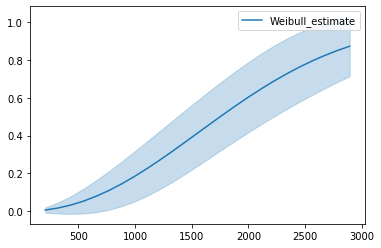

In [9]:
    wbf.plot_cumulative_density() #给出的是累计密度 到3000天之前全部死亡 到1

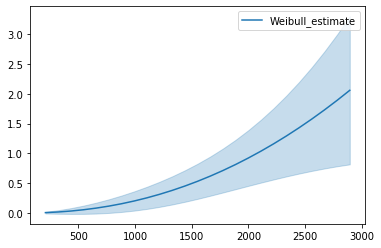

In [10]:
    wbf.plot_cumulative_hazard()  #给出的累计风险 上下界是统计的置信区间  也是默认的plot 与第一个图是一样的

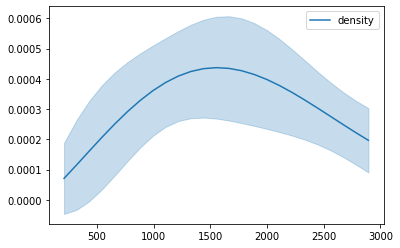

In [11]:
    wbf.plot_density(label="density") #这是瞬时的密度

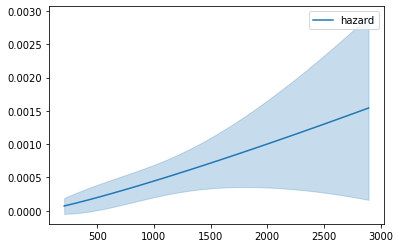

In [12]:
    wbf.plot_hazard(label="hazard") # 这是瞬时的风险

   + 累计风险函数 

		+$$
			H(t)=\left(\frac{t}{\lambda}\right)^{\rho}
			$$

	+ 瞬时风险函数

		+ $$
			h(t)=\frac{\rho}{\lambda}\left(\frac{t}{\lambda}\right)^{\rho-1}
			$$



### 其他一些应用
1. 比较一些生存曲线

In [11]:
from matplotlib import font_manager
import pandas as pd
import os
from matplotlib import pyplot as plt
from lifelines import WeibullFitter
plt.rcParams['font.sans-serif'] = ['SimHei']  #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
my_font = font_manager.FontProperties(fname='msyh.ttc')
def pyplot_oil(excel_dir):
    filelist=[]
    wellname_list=[]
    for root, dirs, files in os.walk(excel_dir):
        for file in files:
            if os.path.splitext(file)[1]=='.xlsx':
                filelist.append(os.path.join(root, file))
                wellname_list.append(os.path.splitext(file)[0])
    for data,wellname in zip(filelist,wellname_list):
        globals()[str(wellname)]=pd.read_excel(data)
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 10))
    wbf=WeibullFitter()
    
    for i in range(len(wellname_list)):
    
        k=globals()[str(wellname_list[i])]
        wbf.fit(k['T'],k['E'])
        ax=wbf.plot_survival_function(label=str(wellname_list[i]))
        # plt.show()
    
    plt.show()
    

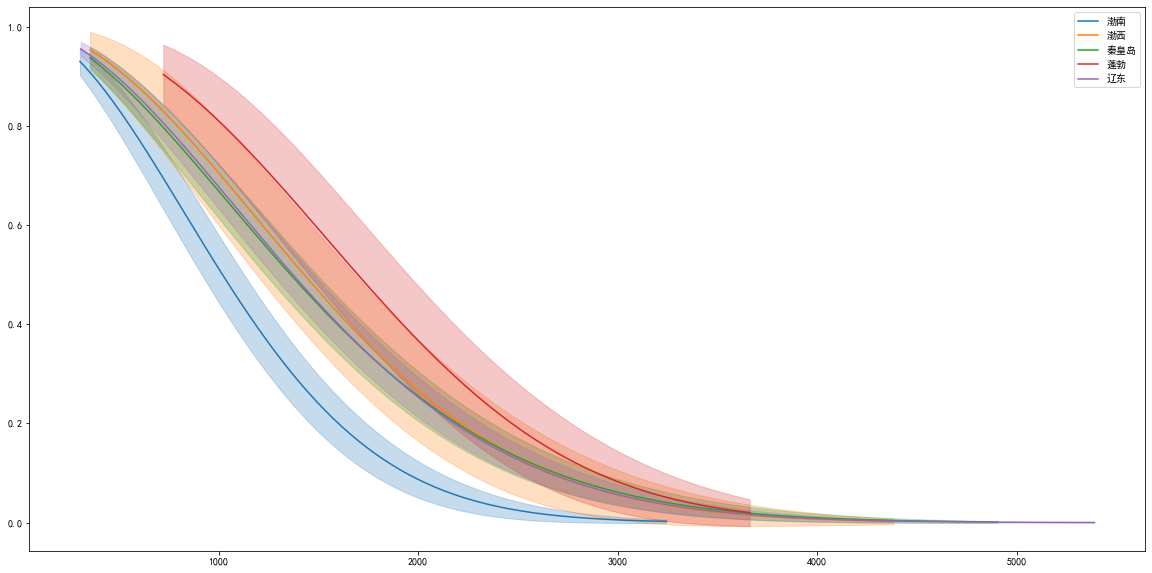

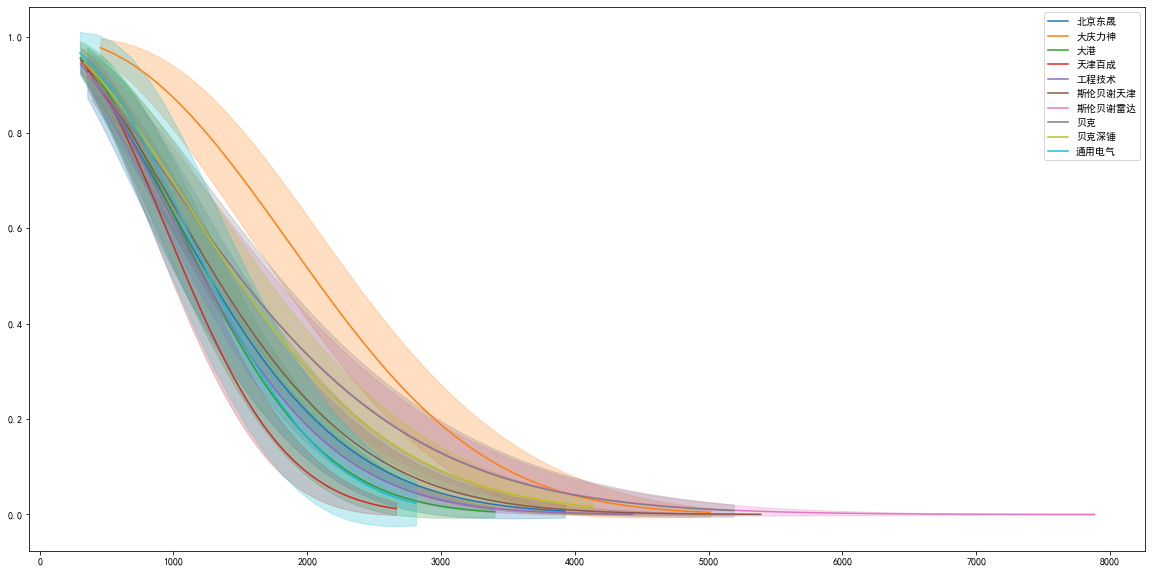

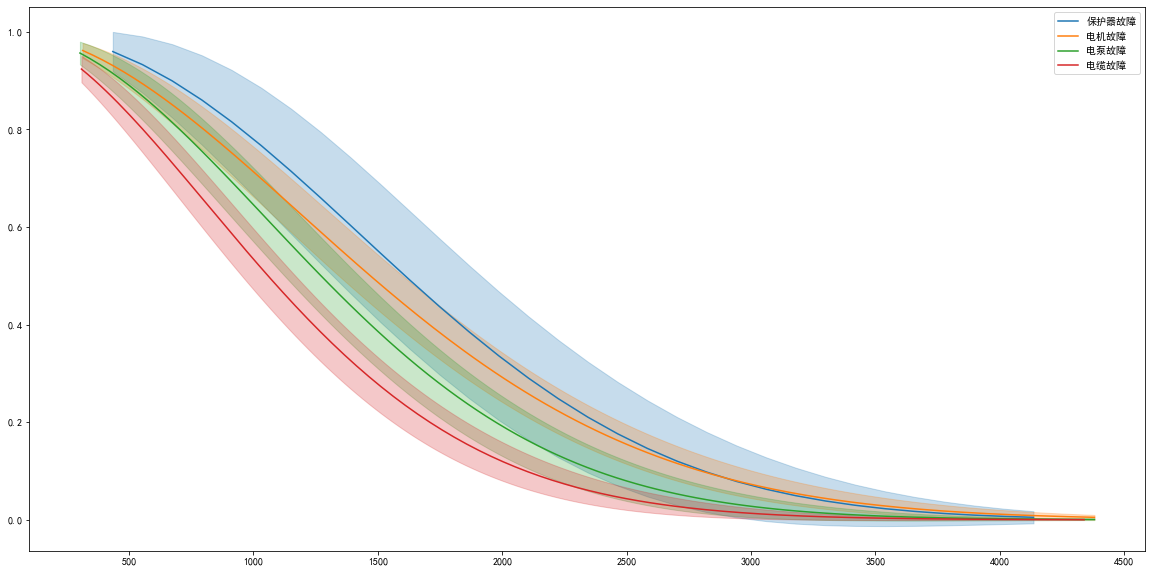

In [13]:
pyplot_oil("按油田分")
pyplot_oil("按厂家分")
pyplot_oil("故障类型")

### 其他参考资料
1. lifelines 官方api文档 https://lifelines.readthedocs.io/en/latest/References.html
2. https://blog.csdn.net/sinat_26917383/article/details/119006906   生存分析 blog 介绍了其他的生存分析方法 和基础用例 
3. https://blog.csdn.net/sinat_26917383/article/details/118929464?spm=1001.2014.3001.5501   生存分析 基础概念